In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/home/adarsh/Desktop/Personal Projects/NutriAI/dataset/full_dataset.csv')
df.head()

,Unnamed: 0,food_entity,disease_entity,sentence,disease_doid,is_cause,is_treat
0,0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"Interestingly, many Indian tribes use Bombax c...",NaN,0.0,1.0
1,1,ultra-processed food,obesity,Ultra-processed food consumption has been asso...,DOID:9970,1.0,0.0
2,2,salt,osteoporosis,Salt has notoriously been blamed for causing a...,DOID:11476,1.0,0.0
3,3,broiler chicken,footpad dermatitis,in broiler chicken flocks when animal-based me...,NaN,0.0,0.0
4,4,sfp,diabetes,"In short, this study demonstrated that SFP cou...",DOID:9351,0.0,1.0


In [3]:
len(df['disease_entity'].unique())

305

In [4]:
top_50_entities = df['disease_entity'].value_counts().head(50).index.tolist()
top_50_entities

['cardiovascular disease',
 'asthma',
 'obesity',
 "alzheimer's disease",
 'osteoporosis',
 'allergy',
 'diabetes',
 'cancer',
 'ad',
 'hypertension',
 'inflammation',
 'chronic diseases',
 'cognitive decline',
 'neurodegenerative diseases',
 'infectious bronchitis',
 'coronary heart disease',
 'dementia',
 'ailments',
 'neural tube defects',
 'allergic reactions',
 'stroke',
 'diabetic',
 'type 2 diabetes',
 'anaemia',
 'cognitive impairment',
 'pain',
 'allergic',
 'infections',
 'cancers',
 'heart disease',
 'cardiovascular diseases',
 'allergies',
 'inflammatory diseases',
 'bronchitis',
 'carcinogenic',
 'hyperglycemia',
 'mastitis',
 'type 2 diabetes mellitus',
 'kidney stones',
 'cvd',
 'atherosclerosis',
 'bronchiolitis obliterans',
 'nephrolithiasis',
 'myocardial infarction',
 'rheumatoid arthritis',
 'metabolic syndrome',
 'respiratory diseases',
 'human diseases',
 'cvds',
 'bone loss']

In [5]:
df_ingredients = pd.read_excel('/kaggle/input/nutriai-datasets/2021-2023 FNDDS At A Glance - FNDDS Ingredients.xlsx')
df_ingredients.head()

,FNDDS Ingredients\n2021-2023 Food and Nutrient Database for Dietary Studies - At A Glance,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Food code,Main food description,WWEIA Category number,WWEIA Category description,Seq num,Ingredient code,Ingredient description,Ingredient weight (g),Retention code,Moisture change\n(%)
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",1,1077,"Milk, whole, 3.25% milkfat, with added vitamin D",40,0,0
2,11100000,"Milk, NFS",1004,"Milk, reduced fat",2,1079,"Milk, reduced fat, fluid, 2% milkfat, with add...",38,0,0
3,11100000,"Milk, NFS",1004,"Milk, reduced fat",3,1082,"Milk, lowfat, fluid, 1% milkfat, with added vi...",14,0,0
4,11100000,"Milk, NFS",1004,"Milk, reduced fat",4,1085,"Milk, nonfat, fluid, with added vitamin A and ...",8,0,0


In [6]:
df_ingre_nutri = pd.read_excel('/kaggle/input/nutriai-datasets/2021-2023 FNDDS At A Glance - Ingredient Nutrient Values.xlsx')
df_ingre_nutri.head()

,Ingredient Nutrient Values\n2021-2023 Food and Nutrient Database for Dietary Studies - At A Glance,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Ingredient code,Ingredient description,Nutrient code,Nutrient description,Nutrient value,Nutrient value source,FDC ID,Derivation code,SR AddMod year,Foundation year acquired
1,1001,"Butter, stick, salted",203,Protein,0.85,SR Legacy,173410,NaN,1976,NaN
2,1001,"Butter, stick, salted",204,Total Fat,82.2,Foundation,790508,A,NaN,2019
3,1001,"Butter, stick, salted",205,Carbohydrate,0.06,SR Legacy,173410,NC,1976,NaN
4,1001,"Butter, stick, salted",208,Energy,743,Informed by FDC Foundation and SR Legacy,NaN,NaN,NaN,NaN


In [7]:
df_nutri_value = pd.read_excel('/kaggle/input/nutriai-datasets/2021-2023 FNDDS At A Glance - FNDDS Nutrient Values.xlsx')
df_nutri_value.head()

,FNDDS Nutrient Values\n2021-2023 Food and Nutrient Database for Dietary Studies - At A Glance,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0,2.14,...,0.002,0,0.074,0.008,0,0.003,0,0.001,0,88.92
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0,3.2,...,0.004,0,0.115,0.013,0,0.004,0.001,0.002,0,88.1
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.9,4.89,0,1.9,...,0.002,0,0.061,0.007,0,0.003,0,0.001,0,89.1
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0,0.95,...,0.001,0,0.033,0.004,0,0.001,0,0,0,89.7


In [8]:
df.shape, df_ingredients.shape, df_ingre_nutri.shape, df_nutri_value.shape

((608, 7), (18585, 10), (112321, 10), (5432, 69))

In [9]:
df_ingredients.columns = df_ingredients.iloc[0]  # Set first row as header
df_ingredients = df_ingredients[1:].reset_index(drop=True)

df_ingre_nutri.columns = df_ingre_nutri.iloc[0]  # Set first row as header
df_ingre_nutri = df_ingre_nutri[1:].reset_index(drop=True)

df_nutri_value.columns = df_nutri_value.iloc[0]  # Set first row as header
df_nutri_value = df_nutri_value[1:].reset_index(drop=True)

In [10]:
df.shape, df_ingredients.shape, df_ingre_nutri.shape, df_nutri_value.shape

((608, 7), (18584, 10), (112320, 10), (5431, 69))

In [11]:
df_ingredients.head()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Seq num,Ingredient code,Ingredient description,Ingredient weight (g),Retention code,Moisture change\n(%)
0,11100000,"Milk, NFS",1004,"Milk, reduced fat",1,1077,"Milk, whole, 3.25% milkfat, with added vitamin D",40,0,0
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",2,1079,"Milk, reduced fat, fluid, 2% milkfat, with add...",38,0,0
2,11100000,"Milk, NFS",1004,"Milk, reduced fat",3,1082,"Milk, lowfat, fluid, 1% milkfat, with added vi...",14,0,0
3,11100000,"Milk, NFS",1004,"Milk, reduced fat",4,1085,"Milk, nonfat, fluid, with added vitamin A and ...",8,0,0
4,11111000,"Milk, whole",1002,"Milk, whole",1,1077,"Milk, whole, 3.25% milkfat, with added vitamin D",100,0,0


In [12]:
df_ingre_nutri.head()

,Ingredient code,Ingredient description,Nutrient code,Nutrient description,Nutrient value,Nutrient value source,FDC ID,Derivation code,SR AddMod year,Foundation year acquired
0,1001,"Butter, stick, salted",203,Protein,0.85,SR Legacy,173410,NaN,1976,NaN
1,1001,"Butter, stick, salted",204,Total Fat,82.2,Foundation,790508,A,NaN,2019
2,1001,"Butter, stick, salted",205,Carbohydrate,0.06,SR Legacy,173410,NC,1976,NaN
3,1001,"Butter, stick, salted",208,Energy,743,Informed by FDC Foundation and SR Legacy,NaN,NaN,NaN,NaN
4,1001,"Butter, stick, salted",221,Alcohol,0,SR Legacy,173410,NaN,1985,NaN


In [13]:
df_nutri_value.head()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0,2.14,...,0.002,0,0.074,0.008,0,0.003,0,0.001,0,88.92
1,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0,3.2,...,0.004,0,0.115,0.013,0,0.004,0.001,0.002,0,88.1
2,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.9,4.89,0,1.9,...,0.002,0,0.061,0.007,0,0.003,0,0.001,0,89.1
3,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0,0.95,...,0.001,0,0.033,0.004,0,0.001,0,0,0,89.7
4,11113000,"Milk, fat free (skim)",1008,"Milk, nonfat",34,3.43,4.92,5.05,0,0.08,...,0,0,0.005,0,0,0,0,0,0,90.8


# KG as DataFrame

In [4]:
import pandas as pd

# Clean helpers
def clean_text(text):
    return str(text).strip().lower()

# Create relationship triples
relationships = []
for _, row in df.iterrows():
    food = clean_text(row["food_entity"])
    disease = clean_text(row["disease_entity"])

    if row["is_cause"] == 1:
        relationships.append((food, "causes", disease, row['sentence']))
    if row["is_treat"] == 1:
        relationships.append((food, "treats", disease, row['sentence']))

# Construct the core KG dataframe
kg_df = pd.DataFrame(relationships, columns=["food", "relationship", "disease", "evidence"])


In [5]:
kg_df

,food,relationship,disease,evidence
0,bombax ceiba l. (bombacaceae) fruits,treats,urinary stones,"Interestingly, many Indian tribes use Bombax c..."
1,ultra-processed food,causes,obesity,Ultra-processed food consumption has been asso...
2,salt,causes,osteoporosis,Salt has notoriously been blamed for causing a...
3,sfp,treats,diabetes,"In short, this study demonstrated that SFP cou..."
4,wine,treats,ad,We also showed that moderate consumption of wi...
...,...,...,...,...
460,lemon,treats,respiratory tract infections,"Natural products like ginger, turmeric, garlic..."
461,nuts,treats,atherosclerosis,"Thus, the inclusion of food sources of dietary..."
462,apple juice,causes,asthma,Intake of beverages with excess free fructose ...
463,coffee,treats,pd,"However, some evidence exists regarding a pote..."


In [16]:
# Merge them to get food → nutrient → value
nutrient_data = pd.merge(
    df_ingredients[['Ingredient description', 'Ingredient code']],
    df_ingre_nutri[['Ingredient code', 'Nutrient description', 'Nutrient value']],
    on='Ingredient code'
)

# Clean columns
nutrient_data.rename(columns={
    'Ingredient description': 'food',
    'Nutrient description': 'nutrient',
    'Nutrient value': 'value'
}, inplace=True)

nutrient_data['food'] = nutrient_data['food'].apply(clean_text)
nutrient_data['nutrient'] = nutrient_data['nutrient'].apply(clean_text)


In [17]:
nutrient_data

,food,Ingredient code,nutrient,value
0,"milk, whole, 3.25% milkfat, with added vitamin d",1077,protein,3.27
1,"milk, whole, 3.25% milkfat, with added vitamin d",1077,total fat,3.2
2,"milk, whole, 3.25% milkfat, with added vitamin d",1077,carbohydrate,4.63
3,"milk, whole, 3.25% milkfat, with added vitamin d",1077,energy,61
4,"milk, whole, 3.25% milkfat, with added vitamin d",1077,alcohol,0
...,...,...,...,...
934045,"oil, industrial, soy, ultra low linolenic",4700,20:5 n-3,0
934046,"oil, industrial, soy, ultra low linolenic",4700,22:1,0
934047,"oil, industrial, soy, ultra low linolenic",4700,22:5 n-3,0
934048,"oil, industrial, soy, ultra low linolenic",4700,"fatty acids, total monounsaturated",28.876


# Vector Database for KG Dataframe

In [18]:
pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.1 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incompatible.
pylibcugraph-cu12 24.12.0 requires rmm-cu12==24.12.*, but you have 

In [19]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')
model.to('cpu')

# Combine food names across datasets
kg_foods = kg_df['food'].unique().tolist()
nutrient_foods = nutrient_data['food'].unique().tolist()
extra_foods = df_nutri_value['Main food description'].unique().tolist()

# Embed food names
kg_embeddings = model.encode(kg_foods, convert_to_tensor=True)
nutrient_embeddings = model.encode(nutrient_foods, convert_to_tensor=True)
extra_embeddings = model.encode(extra_foods, convert_to_tensor=True)

# Compute similarity matrices
sim_nutrient = cosine_similarity(kg_embeddings, nutrient_embeddings)
sim_extra = cosine_similarity(kg_embeddings, extra_embeddings)

# Build food map from KG -> nutrient or df_extra (fallback)
# Modified mapping: store best matches from both datasets
food_nutrient_map = {}
food_extra_map = {}

for i, kg_food in enumerate(kg_foods):
    best_nutrient_idx = np.argmax(sim_nutrient[i])
    best_extra_idx = np.argmax(sim_extra[i])

    food_nutrient_map[kg_food] = nutrient_foods[best_nutrient_idx]
    food_extra_map[kg_food] = extra_foods[best_extra_idx]


2025-05-02 13:14:50.912076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746191691.188871      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746191691.268736      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/54 [00:00<?, ?it/s]

Batches:   0%|          | 0/170 [00:00<?, ?it/s]

In [20]:
def full_disease_food_recommendation(disease_query, kg_df, nutrient_data, df_extra):
    disease_query = clean_text(disease_query)

    # Step 1: Find foods that treat the disease
    treat_df = kg_df[(kg_df['relationship'] == 'treats') & (kg_df['disease'] == disease_query)]
    
    if treat_df.empty:
        return f"❌ No treatment foods found for '{disease_query.title()}'."

    output = []
    for _, row in treat_df.iterrows():
        food = row['food']
        evidence = row['evidence']
        nutrients_list = []
        extra_nutrients_list = []
        
        mapped_nutrient_food = food_nutrient_map.get(food, None)
        mapped_extra_food = food_extra_map.get(food, None)
        
        if mapped_nutrient_food:
            nutrients = nutrient_data[nutrient_data['food'] == mapped_nutrient_food]
            nutrients_list = (
                nutrients[['nutrient', 'value']]
                .drop_duplicates(subset='nutrient', keep='first')
                .sort_values(by='value', ascending=False)
                .head(5)
                .to_dict(orient='records')
            )
        
        if mapped_extra_food:
            extra_row = df_extra[df_extra['Main food description'] == mapped_extra_food]
            if not extra_row.empty:
                nutrient_cols = ['Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars, total\n(g)', 'Fiber, total dietary (g)', 'Total Fat (g)']
                for col in nutrient_cols:
                    if col in extra_row.columns:
                        val = extra_row.iloc[0][col]
                        extra_nutrients_list.append({
                            'nutrient': col.strip(),
                            'value': val
                        })
                        
        food_info = {
            "food": food.title(),
            "evidence": evidence,
            "nutrients": nutrients_list,
            "extra_nutrients": extra_nutrients_list
        }
        output.append(food_info)

    return output


In [21]:
query = "asthma"
recommendations = full_disease_food_recommendation(query, kg_df, nutrient_data, df_nutri_value)

if isinstance(recommendations, str):
    print(recommendations)
else:
    for idx, rec in enumerate(recommendations, 1):
        print(f"\n🔹 Recommendation {idx}: {rec['food']}")
        print("  ➤ Justification (evidence):", rec['evidence'])

        if rec['nutrients']:
            print("  ➤ Contains Nutrients (Top 5):")
            for nut in rec['nutrients']:
                print(f"    - {nut['nutrient'].title()} ({nut['value']})")
        else:
            print("  ➤ No main nutrient info available.")

        if rec['extra_nutrients']:
            print("  ➤ Extra Nutritional Info:")
            for extra in rec['extra_nutrients']:
                print(f"    - {extra['nutrient']} ({extra['value']})")
        else:
            print("  ➤ No extra nutrient data available.")



🔹 Recommendation 1: Certain Foods
  ➤ Justification (evidence): Consumption of certain foods during pregnancy has been shown to have beneficial effects on childhood asthma and allergic disease development and aggravation.
  ➤ Contains Nutrients (Top 5):
    - Sodium (657)
    - Potassium (282)
    - Energy (230)
    - Phosphorus (230)
    - Cholesterol (92)
  ➤ Extra Nutritional Info:
    - Energy (kcal) (185)
    - Protein (g) (6.29)
    - Carbohydrate (g) (24.41)
    - Sugars, total
(g) (0.2)
    - Fiber, total dietary (g) (3.6)
    - Total Fat (g) (6.99)

🔹 Recommendation 2: Fruits
  ➤ Justification (evidence): fruits (CU) has long been used as a traditional medicine that has therapeutic effects against pathogenic diseases, including asthma, vomiting, dyspepsia, blood circulation disorders, and various types of cancer.
  ➤ Contains Nutrients (Top 5):
    - Energy (322)
    - Sodium (98)
    - Carbohydrate (82.74)
    - Sugars, Total (80.68)
    - Potassium (56)
  ➤ Extra Nutritiona

In [22]:
import joblib

joblib.dump({
    'food_nutrient_map': food_nutrient_map,
    'food_extra_map': food_extra_map,
    'kg_foods': kg_foods,
    'nutrient_foods': nutrient_foods,
    'extra_foods': extra_foods,
    'kg_embeddings': kg_embeddings,
    'nutrient_embeddings': nutrient_embeddings,
    'extra_embeddings': extra_embeddings,
    # 'model_name': 'all-MiniLM-L6-v2'  # Optional, for reference
}, 'food_matching_data.pkl')


['food_matching_data.pkl']

In [23]:
# Save kg_df to CSV
kg_df.to_csv('kg_data.csv', index=False)

# Save nutrient_data to CSV
nutrient_data.to_csv('nutrient_data.csv', index=False)

# Save df_nutri_value to CSV
df_nutri_value.to_csv('df_extra.csv', index=False)


In [24]:
import joblib
import pandas as pd

# ============================
# 1. Load saved data
# ============================
# Load the previously saved data
data = joblib.load('/kaggle/working/food_matching_data.pkl')

# Extract data from the loaded object
food_nutrient_map = data['food_nutrient_map']
food_extra_map = data['food_extra_map']
kg_foods = data['kg_foods']
nutrient_foods = data['nutrient_foods']
extra_foods = data['extra_foods']
kg_embeddings = data['kg_embeddings']
nutrient_embeddings = data['nutrient_embeddings']
extra_embeddings = data['extra_embeddings']

# ============================
# 2. Load your datasets again for inference
# ============================
# Make sure you reload your original dataframes (kg_df, nutrient_data, df_nutri_value) for inference
kg_df = pd.read_csv("/kaggle/working/kg_data.csv")  # Example, ensure it's loaded from wherever you saved it
nutrient_data = pd.read_csv("/kaggle/working/nutrient_data.csv")
df_nutri_value = pd.read_csv("/kaggle/working/df_extra.csv")

# ============================
# 3. Clean text function for input
# ============================
def clean_text(text):
    return text.strip().lower()

# ============================
# 4. Inference function
# ============================
def full_disease_food_recommendation(disease_query, kg_df, nutrient_data, df_extra):
    disease_query = clean_text(disease_query)

    treat_df = kg_df[(kg_df['relationship'] == 'treats') & (kg_df['disease'].str.lower() == disease_query)]
    if treat_df.empty:
        return f"❌ No treatment foods found for '{disease_query.title()}'."

    output = []
    for _, row in treat_df.iterrows():
        food = row['food']
        evidence = row['evidence']
        mapped_nutrient_food = food_nutrient_map.get(food)
        mapped_extra_food = food_extra_map.get(food)

        nutrients_list = []
        extra_nutrients_list = []

        # Main nutrients (top 5 by value)
        if mapped_nutrient_food:
            nutrients = nutrient_data[nutrient_data['food'] == mapped_nutrient_food]
            nutrients_list = (
                nutrients[['nutrient', 'value']]
                .drop_duplicates(subset='nutrient', keep='first')
                .sort_values(by='value', ascending=False)
                .head(5)
                .to_dict(orient='records')
            )

        # Extra nutrient values
        if mapped_extra_food:
            extra_row = df_extra[df_extra['Main food description'] == mapped_extra_food]
            if not extra_row.empty:
                nutrient_cols = ['Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)', 
                                 'Sugars, total\n(g)', 'Fiber, total dietary (g)', 'Total Fat (g)']
                for col in nutrient_cols:
                    if col in extra_row.columns:
                        val = extra_row.iloc[0][col]
                        extra_nutrients_list.append({'nutrient': col.strip(), 'value': val})

        output.append({
            "food": food.title(),
            "evidence": evidence,
            "nutrients": nutrients_list,
            "extra_nutrients": extra_nutrients_list
        })

    return output

# ============================
# 5. Example inference
# ============================
query = "asthma"  # Change the disease query here
recommendations = full_disease_food_recommendation(query, kg_df, nutrient_data, df_nutri_value)

if isinstance(recommendations, str):
    print(recommendations)
else:
    for idx, rec in enumerate(recommendations, 1):
        print(f"\n🔹 Recommendation {idx}: {rec['food']}")
        print("  ➤ Justification (evidence):", rec['evidence'])

        if rec['nutrients']:
            print("  ➤ Contains Nutrients (Top 5):")
            for nut in rec['nutrients']:
                print(f"    - {nut['nutrient'].title()} ({nut['value']})")
        else:
            print("  ➤ No main nutrient info available.")

        if rec['extra_nutrients']:
            print("  ➤ Extra Nutritional Info:")
            for extra in rec['extra_nutrients']:
                print(f"    - {extra['nutrient']} ({extra['value']})")
        else:
            print("  ➤ No extra nutrient data available.")



🔹 Recommendation 1: Certain Foods
  ➤ Justification (evidence): Consumption of certain foods during pregnancy has been shown to have beneficial effects on childhood asthma and allergic disease development and aggravation.
  ➤ Contains Nutrients (Top 5):
    - Sodium (657.0)
    - Potassium (282.0)
    - Energy (230.0)
    - Phosphorus (230.0)
    - Cholesterol (92.0)
  ➤ Extra Nutritional Info:
    - Energy (kcal) (185)
    - Protein (g) (6.29)
    - Carbohydrate (g) (24.41)
    - Sugars, total
(g) (0.2)
    - Fiber, total dietary (g) (3.6)
    - Total Fat (g) (6.99)

🔹 Recommendation 2: Fruits
  ➤ Justification (evidence): fruits (CU) has long been used as a traditional medicine that has therapeutic effects against pathogenic diseases, including asthma, vomiting, dyspepsia, blood circulation disorders, and various types of cancer.
  ➤ Contains Nutrients (Top 5):
    - Energy (322.0)
    - Sodium (98.0)
    - Carbohydrate (82.74)
    - Sugars, Total (80.68)
    - Potassium (56.0)
  ➤ 

# Graph NN

In [25]:
%pip install -q torch torchvision torchaudio
%pip install -q torch-geometric

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
kg_df

,food,relationship,disease,evidence
0,bombax ceiba l. (bombacaceae) fruits,treats,urinary stones,"Interestingly, many Indian tribes use Bombax c..."
1,ultra-processed food,causes,obesity,Ultra-processed food consumption has been asso...
2,salt,causes,osteoporosis,Salt has notoriously been blamed for causing a...
3,sfp,treats,diabetes,"In short, this study demonstrated that SFP cou..."
4,wine,treats,ad,We also showed that moderate consumption of wi...
...,...,...,...,...
460,lemon,treats,respiratory tract infections,"Natural products like ginger, turmeric, garlic..."
461,nuts,treats,atherosclerosis,"Thus, the inclusion of food sources of dietary..."
462,apple juice,causes,asthma,Intake of beverages with excess free fructose ...
463,coffee,treats,pd,"However, some evidence exists regarding a pote..."


In [27]:
nutrient_data.sample(5)

,food,Ingredient code,nutrient,value
221806,"noodles, egg, enriched, cooked",20110,lycopene,0.000
271183,"crustaceans, lobster, northern, cooked, moist ...",15148,energy,89.000
123362,"capers, canned",2054,16:1,0.004
137911,"soup, chicken broth, ready-to-serve",6194,8:0,0.000
438910,"eggs, grade a, large, egg whole",1123,riboflavin,0.419


In [28]:
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# # 1. Load embedding model
# model = SentenceTransformer('all-MiniLM-L6-v2')  # or another small, fast model

# model.to('cpu')
# # 2. Get food names
# kg_foods = kg_df['food'].unique()
# nutrient_foods = nutrient_data['food'].unique()

# # 3. Embed all food names
# kg_embeddings = model.encode(kg_foods, convert_to_tensor=True)
# nutrient_embeddings = model.encode(nutrient_foods, convert_to_tensor=True)

# # 4. Compute cosine similarity
# similarity = cosine_similarity(kg_embeddings, nutrient_embeddings)

# # 5. Get best match for each kg_df food
# best_matches = similarity.argmax(axis=1)
# match_scores = similarity.max(axis=1)

# # 6. Create mapping (optionally filter by score threshold)
# mapping = {}
# for i, idx in enumerate(best_matches):
#     if match_scores[i] > 0.6:  # You can tune this threshold
#         mapping[kg_foods[i]] = nutrient_foods[idx]

# # 7. Map and filter
# kg_df['mapped_food'] = kg_df['food'].map(mapping)
# valid_kg = kg_df[kg_df['mapped_food'].notna()]
# nutrient_filtered = nutrient_data[nutrient_data['food'].isin(valid_kg['mapped_food'])]

# from sklearn.preprocessing import StandardScaler, LabelEncoder
# import torch
# from torch_geometric.data import Data

# # Step 1: Pivot so each food has one row, each nutrient is a column
# nutrient_wide = nutrient_filtered.pivot_table(
#     index='food', 
#     columns='nutrient', 
#     values='value', 
#     fill_value=0
# )

# # Step 2: Normalize
# scaler = StandardScaler()
# nutrient_scaled = scaler.fit_transform(nutrient_wide)

# # Step 3: Map food to its nutrient vector
# food_features = {
#     food: nutrient_scaled[i]
#     for i, food in enumerate(nutrient_wide.index)
# }

# # Step 4: Ensure node list includes both diseases and foods
# all_nodes = pd.Series(pd.concat([kg_df['disease'], kg_df['food']])).unique()

# # Step 5: Build node feature matrix
# feature_dim = nutrient_scaled.shape[1]  # FIXED here
# x_features = []

# for node in all_nodes:
#     if node in food_features:
#         x_features.append(food_features[node])
#     else:
#         x_features.append([0.0] * feature_dim)  # zero vector for diseases

# x = torch.tensor(x_features, dtype=torch.float)

# # Step 6: Encode node names
# node_encoder = LabelEncoder().fit(all_nodes)
# node_ids = {name: idx for idx, name in enumerate(all_nodes)}

# # Step 7: Build edge_index
# src = kg_df['disease'].map(node_ids).values
# dst = kg_df['food'].map(node_ids).values
# edge_index = torch.tensor([src, dst], dtype=torch.long)

# # Step 8: Edge labels (1 = treat, 0 = avoid)
# edge_label = torch.tensor((kg_df['relationship'] == 'treats').astype(int).values, dtype=torch.long)

# # Step 9: Create PyG Data object
# data = Data(x=x, edge_index=edge_index, edge_label=edge_label)

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch_geometric.nn import GCNConv

# class GCNModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(GCNModel, self).__init__()
#         self.conv1 = GCNConv(input_dim, hidden_dim)
#         self.conv2 = GCNConv(hidden_dim, output_dim)

#     def forward(self, x, edge_index):
#         # Graph Convolution Layer 1
#         x = F.relu(self.conv1(x, edge_index))
#         # Graph Convolution Layer 2
#         x = self.conv2(x, edge_index)
#         return x

# import torch.optim as optim
# from torch_geometric.data import DataLoader

# # Hyperparameters
# input_dim = x.shape[1]  # Number of features per node (food/disease)
# hidden_dim = 64  # Hidden layer dimension
# output_dim = 2  # We have two classes: 0 (avoid) and 1 (treat)
# learning_rate = 0.001
# epochs = 100

# # Create DataLoader for mini-batch training (optional for large graphs)
# train_data = data  # If the graph is not too large, you can directly use `data` as your training data
# # If using batches, wrap in DataLoader (PyG supports batching)
# # train_loader = DataLoader([train_data], batch_size=1)

# # Create model, optimizer, and loss function
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model = GCNModel(input_dim, hidden_dim, output_dim)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# criterion = torch.nn.CrossEntropyLoss()  # Since this is a classification problem (edge labels)

# model.to(device)
# data.x = data.x.to(device)

# # Training Loop
# model.train()

# for epoch in range(epochs):
#     optimizer.zero_grad()
    
#     # Forward pass
#     out = model(data.x, data.edge_index)
    
#     # Compute loss (only using edge labels)
#     loss = criterion(out[data.edge_index[0]], data.edge_label)  # Use edge_index[0] as source node
    
#     # Backward pass and optimization
#     loss.backward()
#     optimizer.step()
    
#     if epoch % 10 == 0:
#         print(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.4f}")

# # Inference (evaluating on edge predictions)
# model.eval()

# with torch.no_grad():
#     # Get node embeddings after training
#     out = model(data.x, data.edge_index)

#     # Get predictions for edge labels
#     edge_predictions = out[data.edge_index[0]].argmax(dim=1)  # Predicted labels (0 or 1)

#     # Compare predictions with actual edge labels
#     accuracy = (edge_predictions == data.edge_label).sum().item() / data.edge_label.size(0)
#     print(f'Inference Accuracy: {accuracy:.4f}')



Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/54 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# def predict_relation(user_food, user_disease, model, data, node_encoder, food_features, feature_dim, device):
#     """
#     Predict whether the given food and disease pair has "treats" or "avoid" relationship.
#     Uses only CPU operations to avoid CUDA errors.
#     """
#     # Move model to CPU for inference to avoid CUDA errors
#     model = model.cpu()
#     data_cpu = Data(x=data.x.cpu(), edge_index=data.edge_index.cpu(), edge_label=data.edge_label.cpu())
    
#     try:
#         # Check if food and disease exist in our knowledge graph
#         try:
#             # Get the node indices using node_encoder
#             food_idx = int(node_encoder.transform([user_food])[0])
#             disease_idx = int(node_encoder.transform([user_disease])[0])
#         except:
#             return f"Error: Either '{user_food}' or '{user_disease}' not found in the database"
        
#         # Set model to evaluation mode
#         model.eval()
        
#         # Get all node embeddings
#         with torch.no_grad():
#             node_embeddings = model(data_cpu.x, data_cpu.edge_index)
            
#             # Simple approach: Use embeddings of both nodes
#             disease_emb = node_embeddings[disease_idx]
#             food_emb = node_embeddings[food_idx]
            
#             # Calculate similarity or use a simple heuristic for prediction
#             # For simplicity, we'll use the disease node's embedding logits
#             prediction_score = F.softmax(disease_emb, dim=0)
#             pred_class = prediction_score.argmax().item()
            
#             # Alternative: Check if this edge already exists in the graph
#             # and return its known relation
#             for i in range(data_cpu.edge_index.size(1)):
#                 if (data_cpu.edge_index[0, i].item() == disease_idx and 
#                     data_cpu.edge_index[1, i].item() == food_idx):
#                     # This edge exists in our graph, return its known label
#                     known_label = data_cpu.edge_label[i].item()
#                     return f"Found existing relationship: {user_food} and {user_disease} is: **{'Treats' if known_label == 1 else 'Avoid'}**"
        
#         # Return the prediction
#         if pred_class == 1:
#             return f"The predicted relationship between {user_food} and {user_disease} is: **Treats**"
#         else:
#             return f"The predicted relationship between {user_food} and {user_disease} is: **Avoid**"
            
#     except Exception as e:
#         return f"Error processing prediction: {str(e)}"

# # Example of how to call the function with all necessary parameters
# def run_prediction(user_food, user_disease):
#     """
#     Wrapper function to call predict_relation with all necessary parameters
#     """
#     try:
#         # Call prediction function
#         prediction = predict_relation(
#             user_food=user_food,
#             user_disease=user_disease,
#             model=model,
#             data=data,
#             node_encoder=node_encoder,
#             food_features=food_features,
#             feature_dim=feature_dim,
#             device=device
#         )
#         print(prediction)
#         return prediction
#     except Exception as e:
#         print(f"Error in prediction: {str(e)}")
#         return f"Error in prediction: {str(e)}"

# # Example usage
# user_food = "salt"
# user_disease = "osteoporosis"
# result = run_prediction(user_food, user_disease)

In [29]:
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder
import torch

# Encode node names
all_nodes = pd.Series(pd.concat([kg_df['disease'], kg_df['food']])).unique()
node_encoder = LabelEncoder().fit(all_nodes)
node_ids = {name: idx for idx, name in enumerate(all_nodes)}

# Edge index
src = kg_df['disease'].map(node_ids).values
dst = kg_df['food'].map(node_ids).values
edge_index = torch.tensor([src, dst], dtype=torch.long)

# Edge label: 1 = eat, 0 = avoid
edge_label = torch.tensor((kg_df['relationship'] == 'treats').astype(int).values, dtype=torch.long)

# Dummy features (or use your own)
x = torch.eye(len(all_nodes))  # identity matrix as one-hot

data = Data(x=x, edge_index=edge_index, edge_label=edge_label)

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNNLinkPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.link_predictor = nn.Sequential(
            nn.Linear(2 * hidden_channels, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x, edge_index, edge_pairs):
        h = self.conv1(x, edge_index)
        h = F.relu(h)
        h = self.conv2(h, edge_index)

        # get embeddings for source and target nodes
        src, dst = edge_pairs
        h_src, h_dst = h[src], h[dst]
        edge_feat = torch.cat([h_src, h_dst], dim=1)
        return torch.sigmoid(self.link_predictor(edge_feat))

from torch_geometric.utils import negative_sampling

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GNNLinkPredictor(in_channels=data.num_node_features, hidden_channels=64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

data = data.to(device)

for epoch in range(1, 201):
    model.train()
    optimizer.zero_grad()

    # Positive samples
    pos_edge_index = data.edge_index
    pos_preds = model(data.x, pos_edge_index, pos_edge_index)
    pos_labels = data.edge_label.float()

    # Negative samples
    neg_edge_index = negative_sampling(
        edge_index=data.edge_index,
        num_nodes=data.num_nodes,
        num_neg_samples=pos_edge_index.size(1)
    )
    neg_preds = model(data.x, data.edge_index, neg_edge_index)
    neg_labels = torch.zeros(neg_preds.size(0), device=device)

    # Combine
    preds = torch.cat([pos_preds, neg_preds])
    labels = torch.cat([pos_labels, neg_labels])

    loss = loss_fn(preds.view(-1), labels)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        pred_binary = (preds > 0.5).float()
        acc = (pred_binary == labels).float().mean().item()
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

@torch.no_grad()
def recommend(disease_name, top_k=10, recommend_type="eat"):  # or "avoid"
    model.eval()
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    data.x = data.x.to(device)
    
    data.edge_index = data.edge_index.to(device)
    disease_idx = node_ids.get(disease_name)
    if disease_idx is None:
        return "Disease not found."

    food_nodes = kg_df['food'].unique()
    food_indices = [node_ids[f] for f in food_nodes]

    edge_pairs = torch.tensor([[disease_idx]*len(food_indices), food_indices], dtype=torch.long).to(device)
    scores = model(data.x, data.edge_index, edge_pairs).view(-1)

    sorted_indices = scores.argsort(descending=True)
    if recommend_type == "avoid":
        sorted_indices = scores.argsort()  # ascending = worst matches

    top_indices = sorted_indices[:top_k]
    return [food_nodes[i] for i in top_indices.cpu().numpy()]


/tmp/ipykernel_31/2861976825.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  edge_index = torch.tensor([src, dst], dtype=torch.long)


Epoch 20, Loss: 0.2132, Accuracy: 0.5332
Epoch 40, Loss: 0.1671, Accuracy: 0.5309
Epoch 60, Loss: 0.1455, Accuracy: 0.5345
Epoch 80, Loss: 0.1240, Accuracy: 0.5351
Epoch 100, Loss: 0.1323, Accuracy: 0.5315
Epoch 120, Loss: 0.0918, Accuracy: 0.5381
Epoch 140, Loss: 0.0572, Accuracy: 0.5433
Epoch 160, Loss: 0.0411, Accuracy: 0.5447
Epoch 180, Loss: 0.0318, Accuracy: 0.5443
Epoch 200, Loss: 0.0453, Accuracy: 0.5447


In [30]:
recommended_foods = recommend('asthma')
recommended_foods

['fruit',
 'olive oil',
 'beer',
 'coffee',
 'beans',
 'milk consumption',
 'ginger',
 'fruits',
 'extra-virgin olive oil',
 'avocado soybean unsaponifiables (asu)']

In [34]:
import pickle
with open('gnnLinkPredictor.pkl', 'wb') as f:
    pickle.dump(model, f)

In [31]:
import torch
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

class RecommendationExplainer:
    def __init__(self, model, data, node_ids, kg_df):
        self.model = model
        self.data = data
        self.node_ids = node_ids
        self.kg_df = kg_df
        
        # Reverse the node_ids mapping
        self.id_to_node = {idx: name for name, idx in node_ids.items()}
        
        # Extract node embeddings
        self.node_embeddings = self._extract_node_embeddings()
        
        # Create a networkx graph from the data
        self.G = to_networkx(data, to_undirected=False)
        
    def _extract_node_embeddings(self):
        """Extract the node embeddings from the trained GNN model"""
        self.model.eval()
        with torch.no_grad():
            # Pass through the first GCN layer
            h = self.model.conv1(self.data.x, self.data.edge_index)
            h = torch.nn.functional.relu(h)
            # Pass through the second GCN layer
            h = self.model.conv2(h, self.data.edge_index)
            return h.cpu().numpy()
    
    def get_similar_diseases(self, disease_name, top_k=5):
        """Find diseases with similar embeddings"""
        disease_idx = self.node_ids.get(disease_name)
        if disease_idx is None:
            return "Disease not found."
        
        # Get the embedding of the target disease
        disease_embedding = self.node_embeddings[disease_idx].reshape(1, -1)
        
        # Get all disease indices and names
        disease_nodes = self.kg_df['disease'].unique()
        disease_indices = [self.node_ids[d] for d in disease_nodes if d != disease_name]
        
        # Calculate similarity
        similarities = cosine_similarity(
            disease_embedding, 
            self.node_embeddings[disease_indices]
        )[0]
        
        # Get top k similar diseases
        top_indices = np.argsort(similarities)[-top_k:][::-1]
        return [(disease_nodes[i], similarities[i]) for i in top_indices]
    
    def get_common_treatments(self, disease_name, food_name):
        """Find diseases that are also treated by the recommended food"""
        food_idx = self.node_ids.get(food_name)
        
        # Get all edges where this food is the target
        related_diseases = []
        for i, row in self.kg_df.iterrows():
            if row['food'] == food_name and row['relationship'] == 'treats':
                related_diseases.append(row['disease'])
                
        return related_diseases
    
    def get_subgraph_influence(self, disease_name, food_name, n_hops=2):
        """Analyze the local subgraph to find influence paths"""
        disease_idx = self.node_ids.get(disease_name)
        food_idx = self.node_ids.get(food_name)
        
        if disease_idx is None or food_idx is None:
            return "Node not found."
            
        # Get n-hop neighborhood of disease
        paths = []
        for path in nx.all_simple_paths(self.G, source=disease_idx, target=food_idx, cutoff=n_hops):
            node_names = [self.id_to_node[idx] for idx in path]
            paths.append(node_names)
            
        return paths
    
    def explain_recommendation(self, disease_name, food_name):
        """Generate a comprehensive explanation for why a food is recommended"""
        # Get embedding similarity score
        disease_idx = self.node_ids.get(disease_name)
        food_idx = self.node_ids.get(food_name)
        
        if disease_idx is None or food_idx is None:
            return "Node not found."
        
        # Direct edge check
        direct_relation = None
        for i, row in self.kg_df.iterrows():
            if row['disease'] == disease_name and row['food'] == food_name:
                direct_relation = row['relationship']
                break
        
        # Get similar diseases that have a known relation with this food
        similar_diseases = self.get_similar_diseases(disease_name, top_k=3)
        
        # Check if any similar diseases have a direct relation with this food
        similar_disease_relations = []
        for sim_disease, sim_score in similar_diseases:
            for i, row in self.kg_df.iterrows():
                if row['disease'] == sim_disease and row['food'] == food_name:
                    similar_disease_relations.append((sim_disease, row['relationship'], sim_score))
                    break
        
        # Get other diseases treated by this food
        common_treatments = self.get_common_treatments(disease_name, food_name)
        
        # Craft the explanation
        explanation = {
            "food": food_name,
            "direct_relation": direct_relation,
            "similar_diseases": similar_disease_relations,
            "common_treatments": common_treatments
        }
        
        return explanation
    
    def get_explanation_text(self, disease_name, food_name):
        """Generate a human-readable explanation for the recommendation"""
        explanation = self.explain_recommendation(disease_name, food_name)
        
        if isinstance(explanation, str):  # Error message
            return explanation
            
        text = f"Explanation for recommending {explanation['food']} for {disease_name}:\n\n"
        
        # Direct relation
        if explanation['direct_relation']:
            rel = "beneficial for" if explanation['direct_relation'] == 'treats' else "should be avoided for"
            text += f"✓ There is a known direct relation: {explanation['food']} {rel} {disease_name}.\n\n"
        else:
            text += f"✓ The model has identified {explanation['food']} as potentially beneficial for {disease_name} based on learned patterns.\n\n"
        
        # Similar diseases
        if explanation['similar_diseases']:
            text += "✓ Similar conditions with known relationships to this food:\n"
            for disease, rel, score in explanation['similar_diseases']:
                rel_text = "benefits from" if rel == 'treats' else "should avoid"
                text += f"   - {disease} (similarity: {score:.2f}) {rel_text} {explanation['food']}.\n"
            text += "\n"
        
        # Common treatments
        if explanation['common_treatments']:
            text += f"✓ {explanation['food']} is also known to be beneficial for these conditions:\n"
            for disease in explanation['common_treatments']:
                if disease != disease_name:  # Skip the disease we're explaining
                    text += f"   - {disease}\n"
            text += "\n"
            
        text += f"The model learned these patterns from the knowledge graph and determined that {explanation['food']} would be a good recommendation for {disease_name}."
        
        return text

    def visualize_recommendation_network(self, disease_name, food_name, save_path=None):
        """Visualize the network around the disease and recommended food"""
        disease_idx = self.node_ids.get(disease_name)
        food_idx = self.node_ids.get(food_name)
        
        if disease_idx is None or food_idx is None:
            return "Node not found."
        
        # Create a subgraph for visualization
        # Include the direct neighbors of both the disease and food
        neighbors = set([disease_idx, food_idx])
        for node in [disease_idx, food_idx]:
            neighbors.update(self.G.neighbors(node))
        
        subgraph = self.G.subgraph(neighbors)
        pos = nx.spring_layout(subgraph)
        
        # Create node labels
        labels = {idx: self.id_to_node[idx] for idx in subgraph.nodes()}
        
        # Create node colors (red for disease, green for food, blue for others)
        node_colors = []
        for node in subgraph.nodes():
            if node == disease_idx:
                node_colors.append('red')
            elif node == food_idx:
                node_colors.append('green')
            elif self.id_to_node[node] in self.kg_df['disease'].values:
                node_colors.append('lightcoral')  # Light red for other diseases
            else:
                node_colors.append('lightgreen')  # Light green for other foods
        
        plt.figure(figsize=(10, 8))
        nx.draw_networkx(
            subgraph, pos, 
            labels=labels, 
            node_color=node_colors,
            node_size=500, 
            font_size=10, 
            font_weight='bold',
            edge_color='gray'
        )
        plt.title(f"Network visualization for {disease_name} and {food_name}")
        plt.axis('off')
        
        if save_path:
            plt.savefig(save_path)
            return f"Visualization saved to {save_path}"
        else:
            plt.show()
            return "Visualization displayed"

# Function to explain multiple recommendations
def explain_recommendations(disease_name, recommended_foods, model, data, node_ids, kg_df, top_n=5):
    """Explain a list of food recommendations for a disease"""
    explainer = RecommendationExplainer(model, data, node_ids, kg_df)
    
    print(f"Explanations for top {top_n} recommended foods for {disease_name}:")
    print("-" * 80)
    
    for i, food in enumerate(recommended_foods[:top_n]):
        print(f"\n{i+1}. {food}")
        explanation = explainer.get_explanation_text(disease_name, food)
        print(explanation)
        print("-" * 80)
    
    return explainer




1. fruit
Explanation for recommending fruit for asthma:

✓ The model has identified fruit as potentially beneficial for asthma based on learned patterns.

✓ fruit is also known to be beneficial for these conditions:
   - dementia
   - bladder cancer
   - inflammation
   - hypertension
   - urolithiasis
   - coronary heart disease
   - cardiovascular diseases
   - cardiovascular disease
   - cognitive decline
   - chronic diseases
   - cardiovascular and cerebrovascular diseases

The model learned these patterns from the knowledge graph and determined that fruit would be a good recommendation for asthma.
--------------------------------------------------------------------------------

2. olive oil
Explanation for recommending olive oil for asthma:

✓ The model has identified olive oil as potentially beneficial for asthma based on learned patterns.

✓ Similar conditions with known relationships to this food:
   - carcinogenic (similarity: 0.98) benefits from olive oil.

✓ olive oil is a

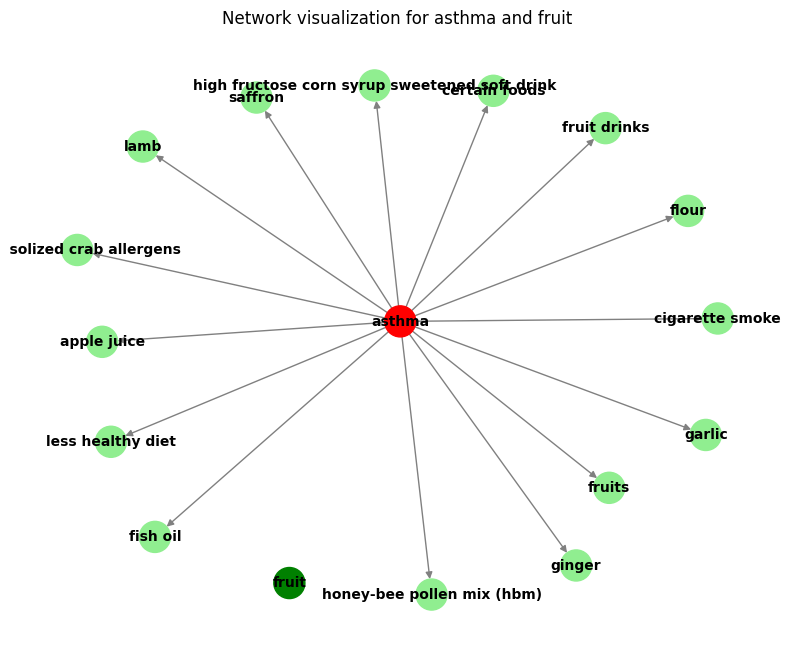

In [32]:
# Example usage
if __name__ == "__main__":
    # This would be used with your existing code
    explainer = RecommendationExplainer(model, data, node_ids, kg_df)
    
    # Explain asthma recommendations
    disease_name = 'asthma'
    for i, food in enumerate(recommended_foods[:5]):
        print(f"\n{i+1}. {food}")
        explanation = explainer.get_explanation_text(disease_name, food)
        print(explanation)
        print("-" * 80)
    
    # Visualize the first recommendation
    if len(recommended_foods) > 0:
        explainer.visualize_recommendation_network(disease_name, recommended_foods[0])

Explanations for top 5 recommended foods for asthma:
--------------------------------------------------------------------------------

1. fruit
Explanation for recommending fruit for asthma:

✓ The model has identified fruit as potentially beneficial for asthma based on learned patterns.

✓ fruit is also known to be beneficial for these conditions:
   - dementia
   - bladder cancer
   - inflammation
   - hypertension
   - urolithiasis
   - coronary heart disease
   - cardiovascular diseases
   - cardiovascular disease
   - cognitive decline
   - chronic diseases
   - cardiovascular and cerebrovascular diseases

The model learned these patterns from the knowledge graph and determined that fruit would be a good recommendation for asthma.
--------------------------------------------------------------------------------

2. olive oil
Explanation for recommending olive oil for asthma:

✓ The model has identified olive oil as potentially beneficial for asthma based on learned patterns.

✓ Sim


Enter number for detailed explanation (1-10):  7



DETAILED EXPLANATION FOR GINGER
Explanation for recommending ginger for asthma:

✓ There is a known direct relation: ginger beneficial for asthma.

✓ ginger is also known to be beneficial for these conditions:
   - diabetes
   - memory dysfunction
   - behavioral dysfunction
   - inflammation
   - nausea
   - diabetes mellitus
   - ailments
   - diabetic liver, kidney, eye, and neural system complications
   - alzheimer's disease
   - human ailments
   - obesity
   - alzheimer disease
   - obesity-related impairments
   - hyperlipidemia
   - human diseases

The model learned these patterns from the knowledge graph and determined that ginger would be a good recommendation for asthma.



Visualize network? (y/n):  y


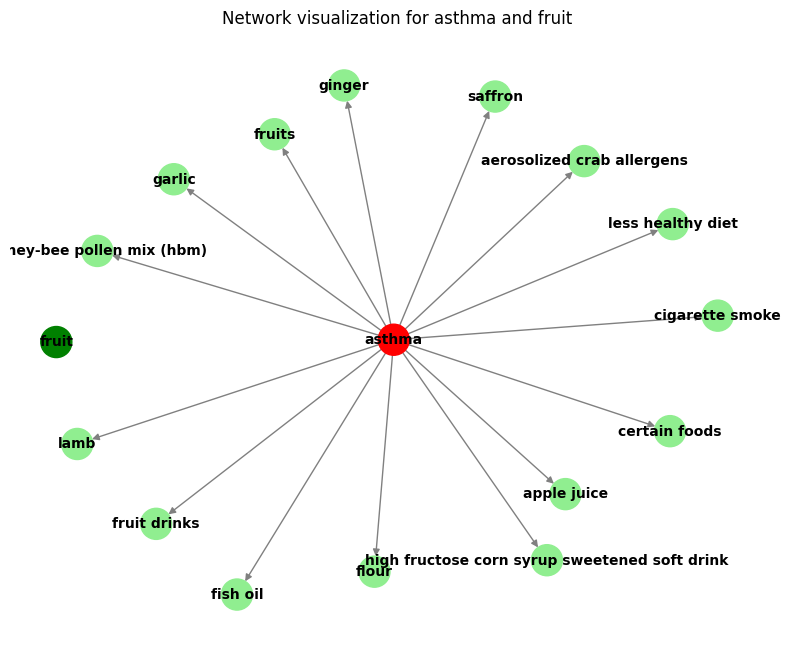

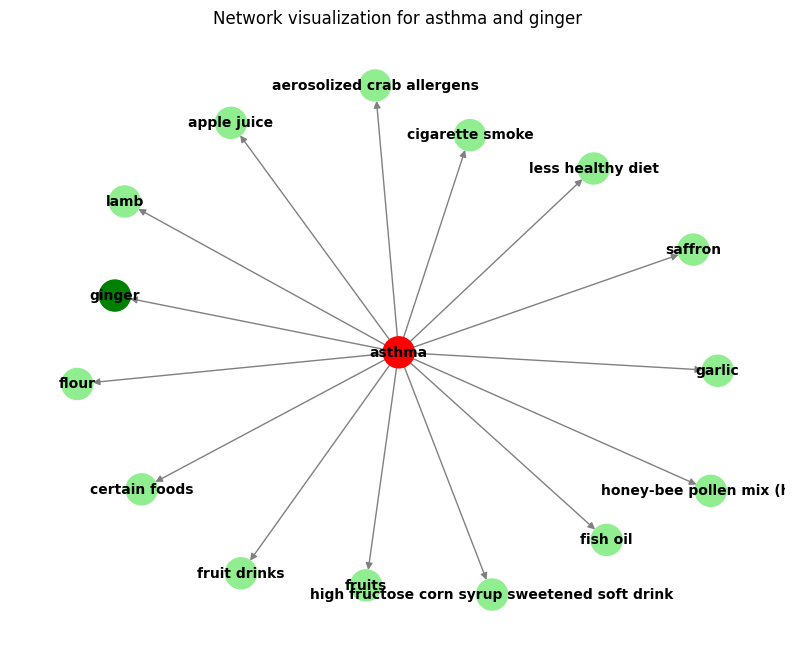

In [33]:
# After you've run your model and obtained recommendations
# from RecommendationExplainer import RecommendationExplainer, explain_recommendations

# Get explanations for the asthma recommendations
explainer = explain_recommendations('asthma', recommended_foods, model, data, node_ids, kg_df, top_n=5)

# For a single recommendation
food = recommended_foods[0]
print(f"\nDetailed explanation for {food}:")
explanation = explainer.get_explanation_text('asthma', food)
print(explanation)

# Visualize the network for the top recommendation
explainer.visualize_recommendation_network('asthma', food, save_path="asthma_recommendation_network.png")

# You can also create an interactive dashboard function
def create_recommendation_dashboard(disease_name):
    """Create an interactive dashboard for food recommendations with explanations"""
    foods = recommend(disease_name)
    print(f"Top recommendations for {disease_name}:")
    
    explainer = RecommendationExplainer(model, data, node_ids, kg_df)
    
    for i, food in enumerate(foods[:10]):
        print(f"{i+1}. {food}")
        
    selected = int(input("\nEnter number for detailed explanation (1-10): ")) - 1
    if 0 <= selected < len(foods):
        selected_food = foods[selected]
        print("\n" + "="*80)
        print(f"DETAILED EXPLANATION FOR {selected_food.upper()}")
        print("="*80)
        explanation = explainer.get_explanation_text(disease_name, selected_food)
        print(explanation)
        
        if input("\nVisualize network? (y/n): ").lower() == 'y':
            explainer.visualize_recommendation_network(disease_name, selected_food)
    
    return foods, explainer

# Example usage
foods, explainer = create_recommendation_dashboard('asthma')

In [35]:
import pickle
import torch

# Save model
torch.save(model.state_dict(), 'gnn_model.pt')

# Save additional required objects
with open('gnn_assets.pkl', 'wb') as f:
    pickle.dump({
        'node_ids': node_ids,
        'kg_df': kg_df,
        'x': data.x.cpu(),
        'edge_index': data.edge_index.cpu()
    }, f)




In [39]:
import torch
import pickle
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.utils import to_networkx
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define the GNN model again
class GNNLinkPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.link_predictor = nn.Sequential(
            nn.Linear(2 * hidden_channels, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x, edge_index, edge_pairs):
        h = self.conv1(x, edge_index)
        h = F.relu(h)
        h = self.conv2(h, edge_index)

        src, dst = edge_pairs
        h_src, h_dst = h[src], h[dst]
        edge_feat = torch.cat([h_src, h_dst], dim=1)
        return torch.sigmoid(self.link_predictor(edge_feat))

# Load saved assets
with open('gnn_assets.pkl', 'rb') as f:
    assets = pickle.load(f)

node_ids = assets['node_ids']
kg_df = assets['kg_df']
x = assets['x']
edge_index = assets['edge_index']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare Data object
data = Data(x=x, edge_index=edge_index).to(device)

# Initialize and load model
model = GNNLinkPredictor(in_channels=x.size(1), hidden_channels=64).to(device)
model.load_state_dict(torch.load('gnn_model.pt', map_location=device))
model.eval()


@torch.no_grad()
def recommend(disease_name, top_k=10, recommend_type="eat"):  # or "avoid"
    model.eval()
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    data.x = data.x.to(device)
    
    data.edge_index = data.edge_index.to(device)
    disease_idx = node_ids.get(disease_name)
    if disease_idx is None:
        return "Disease not found."

    food_nodes = kg_df['food'].unique()
    food_indices = [node_ids[f] for f in food_nodes]

    edge_pairs = torch.tensor([[disease_idx]*len(food_indices), food_indices], dtype=torch.long).to(device)
    scores = model(data.x, data.edge_index, edge_pairs).view(-1)

    sorted_indices = scores.argsort(descending=True)
    if recommend_type == "avoid":
        sorted_indices = scores.argsort()  # ascending = worst matches

    top_indices = sorted_indices[:top_k]
    return [food_nodes[i] for i in top_indices.cpu().numpy()]


class RecommendationExplainer:
    def __init__(self, model, data, node_ids, kg_df):
        self.model = model
        self.data = data
        self.node_ids = node_ids
        self.kg_df = kg_df
        
        # Reverse the node_ids mapping
        self.id_to_node = {idx: name for name, idx in node_ids.items()}
        
        # Extract node embeddings
        self.node_embeddings = self._extract_node_embeddings()
        
        # Create a networkx graph from the data
        self.G = to_networkx(data, to_undirected=False)
        
    def _extract_node_embeddings(self):
        """Extract the node embeddings from the trained GNN model"""
        self.model.eval()
        with torch.no_grad():
            # Pass through the first GCN layer
            h = self.model.conv1(self.data.x, self.data.edge_index)
            h = torch.nn.functional.relu(h)
            # Pass through the second GCN layer
            h = self.model.conv2(h, self.data.edge_index)
            return h.cpu().numpy()
    
    def get_similar_diseases(self, disease_name, top_k=5):
        """Find diseases with similar embeddings"""
        disease_idx = self.node_ids.get(disease_name)
        if disease_idx is None:
            return "Disease not found."
        
        # Get the embedding of the target disease
        disease_embedding = self.node_embeddings[disease_idx].reshape(1, -1)
        
        # Get all disease indices and names
        disease_nodes = self.kg_df['disease'].unique()
        disease_indices = [self.node_ids[d] for d in disease_nodes if d != disease_name]
        
        # Calculate similarity
        similarities = cosine_similarity(
            disease_embedding, 
            self.node_embeddings[disease_indices]
        )[0]
        
        # Get top k similar diseases
        top_indices = np.argsort(similarities)[-top_k:][::-1]
        return [(disease_nodes[i], similarities[i]) for i in top_indices]
    
    def get_common_treatments(self, disease_name, food_name):
        """Find diseases that are also treated by the recommended food"""
        food_idx = self.node_ids.get(food_name)
        
        # Get all edges where this food is the target
        related_diseases = []
        for i, row in self.kg_df.iterrows():
            if row['food'] == food_name and row['relationship'] == 'treats':
                related_diseases.append(row['disease'])
                
        return related_diseases
    
    def get_subgraph_influence(self, disease_name, food_name, n_hops=2):
        """Analyze the local subgraph to find influence paths"""
        disease_idx = self.node_ids.get(disease_name)
        food_idx = self.node_ids.get(food_name)
        
        if disease_idx is None or food_idx is None:
            return "Node not found."
            
        # Get n-hop neighborhood of disease
        paths = []
        for path in nx.all_simple_paths(self.G, source=disease_idx, target=food_idx, cutoff=n_hops):
            node_names = [self.id_to_node[idx] for idx in path]
            paths.append(node_names)
            
        return paths
    
    def explain_recommendation(self, disease_name, food_name):
        """Generate a comprehensive explanation for why a food is recommended"""
        # Get embedding similarity score
        disease_idx = self.node_ids.get(disease_name)
        food_idx = self.node_ids.get(food_name)
        
        if disease_idx is None or food_idx is None:
            return "Node not found."
        
        # Direct edge check
        direct_relation = None
        for i, row in self.kg_df.iterrows():
            if row['disease'] == disease_name and row['food'] == food_name:
                direct_relation = row['relationship']
                break
        
        # Get similar diseases that have a known relation with this food
        similar_diseases = self.get_similar_diseases(disease_name, top_k=3)
        
        # Check if any similar diseases have a direct relation with this food
        similar_disease_relations = []
        for sim_disease, sim_score in similar_diseases:
            for i, row in self.kg_df.iterrows():
                if row['disease'] == sim_disease and row['food'] == food_name:
                    similar_disease_relations.append((sim_disease, row['relationship'], sim_score))
                    break
        
        # Get other diseases treated by this food
        common_treatments = self.get_common_treatments(disease_name, food_name)
        
        # Craft the explanation
        explanation = {
            "food": food_name,
            "direct_relation": direct_relation,
            "similar_diseases": similar_disease_relations,
            "common_treatments": common_treatments
        }
        
        return explanation
    
    def get_explanation_text(self, disease_name, food_name):
        """Generate a human-readable explanation for the recommendation"""
        explanation = self.explain_recommendation(disease_name, food_name)
        
        if isinstance(explanation, str):  # Error message
            return explanation
            
        text = f"Explanation for recommending {explanation['food']} for {disease_name}:\n\n"
        
        # Direct relation
        if explanation['direct_relation']:
            rel = "beneficial for" if explanation['direct_relation'] == 'treats' else "should be avoided for"
            text += f"✓ There is a known direct relation: {explanation['food']} {rel} {disease_name}.\n\n"
        else:
            text += f"✓ The model has identified {explanation['food']} as potentially beneficial for {disease_name} based on learned patterns.\n\n"
        
        # Similar diseases
        if explanation['similar_diseases']:
            text += "✓ Similar conditions with known relationships to this food:\n"
            for disease, rel, score in explanation['similar_diseases']:
                rel_text = "benefits from" if rel == 'treats' else "should avoid"
                text += f"   - {disease} (similarity: {score:.2f}) {rel_text} {explanation['food']}.\n"
            text += "\n"
        
        # Common treatments
        if explanation['common_treatments']:
            text += f"✓ {explanation['food']} is also known to be beneficial for these conditions:\n"
            for disease in explanation['common_treatments']:
                if disease != disease_name:  # Skip the disease we're explaining
                    text += f"   - {disease}\n"
            text += "\n"
            
        text += f"The model learned these patterns from the knowledge graph and determined that {explanation['food']} would be a good recommendation for {disease_name}."
        
        return text

    def visualize_recommendation_network(self, disease_name, food_name, save_path=None):
        """Visualize the network around the disease and recommended food"""
        disease_idx = self.node_ids.get(disease_name)
        food_idx = self.node_ids.get(food_name)
        
        if disease_idx is None or food_idx is None:
            return "Node not found."
        
        # Create a subgraph for visualization
        # Include the direct neighbors of both the disease and food
        neighbors = set([disease_idx, food_idx])
        for node in [disease_idx, food_idx]:
            neighbors.update(self.G.neighbors(node))
        
        subgraph = self.G.subgraph(neighbors)
        pos = nx.spring_layout(subgraph)
        
        # Create node labels
        labels = {idx: self.id_to_node[idx] for idx in subgraph.nodes()}
        
        # Create node colors (red for disease, green for food, blue for others)
        node_colors = []
        for node in subgraph.nodes():
            if node == disease_idx:
                node_colors.append('red')
            elif node == food_idx:
                node_colors.append('green')
            elif self.id_to_node[node] in self.kg_df['disease'].values:
                node_colors.append('lightcoral')  # Light red for other diseases
            else:
                node_colors.append('lightgreen')  # Light green for other foods
        
        plt.figure(figsize=(10, 8))
        nx.draw_networkx(
            subgraph, pos, 
            labels=labels, 
            node_color=node_colors,
            node_size=500, 
            font_size=10, 
            font_weight='bold',
            edge_color='gray'
        )
        plt.title(f"Network visualization for {disease_name} and {food_name}")
        plt.axis('off')
        
        if save_path:
            plt.savefig(save_path)
            return f"Visualization saved to {save_path}"
        else:
            plt.show()
            return "Visualization displayed"

# Function to explain multiple recommendations
def explain_recommendations(disease_name, recommended_foods, model, data, node_ids, kg_df, top_n=5):
    """Explain a list of food recommendations for a disease"""
    explainer = RecommendationExplainer(model, data, node_ids, kg_df)
    
    print(f"Explanations for top {top_n} recommended foods for {disease_name}:")
    print("-" * 80)
    
    for i, food in enumerate(recommended_foods[:top_n]):
        print(f"\n{i+1}. {food}")
        explanation = explainer.get_explanation_text(disease_name, food)
        print(explanation)
        print("-" * 80)
    
    return explainer



/tmp/ipykernel_31/2211773507.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('gnn_model.pt', map_location=device))


Explanations for top 5 recommended foods for asthma:
--------------------------------------------------------------------------------

1. fruit
Explanation for recommending fruit for asthma:

✓ The model has identified fruit as potentially beneficial for asthma based on learned patterns.

✓ fruit is also known to be beneficial for these conditions:
   - dementia
   - bladder cancer
   - inflammation
   - hypertension
   - urolithiasis
   - coronary heart disease
   - cardiovascular diseases
   - cardiovascular disease
   - cognitive decline
   - chronic diseases
   - cardiovascular and cerebrovascular diseases

The model learned these patterns from the knowledge graph and determined that fruit would be a good recommendation for asthma.
--------------------------------------------------------------------------------

2. olive oil
Explanation for recommending olive oil for asthma:

✓ The model has identified olive oil as potentially beneficial for asthma based on learned patterns.

✓ Sim


Enter number for detailed explanation (1-10):  3



DETAILED EXPLANATION FOR BEER
Explanation for recommending beer for asthma:

✓ The model has identified beer as potentially beneficial for asthma based on learned patterns.

✓ beer is also known to be beneficial for these conditions:
   - memory impairment
   - ad
   - alzheimer's disease
   - inflammation
   - chronic diseases
   - cognitive impairment
   - brain disorders

The model learned these patterns from the knowledge graph and determined that beer would be a good recommendation for asthma.



Visualize network? (y/n):  y


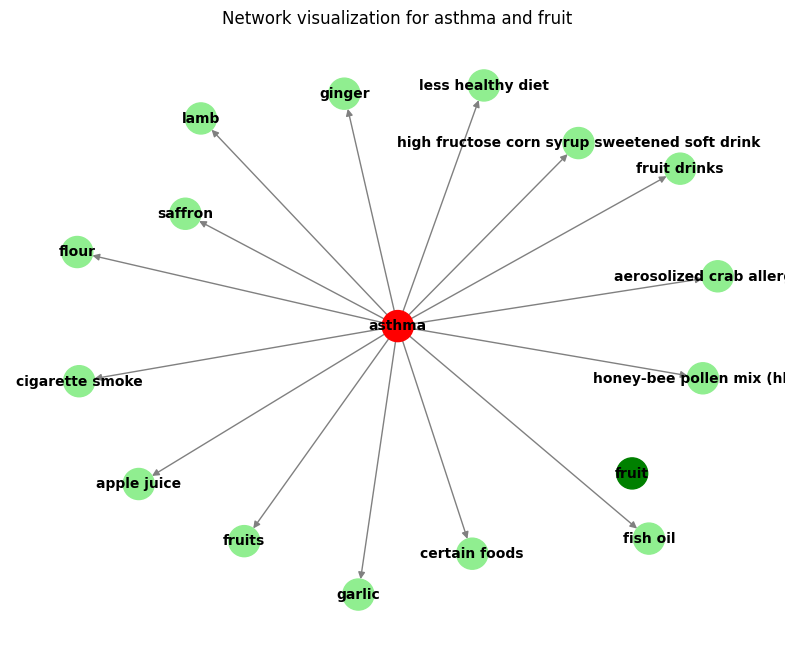

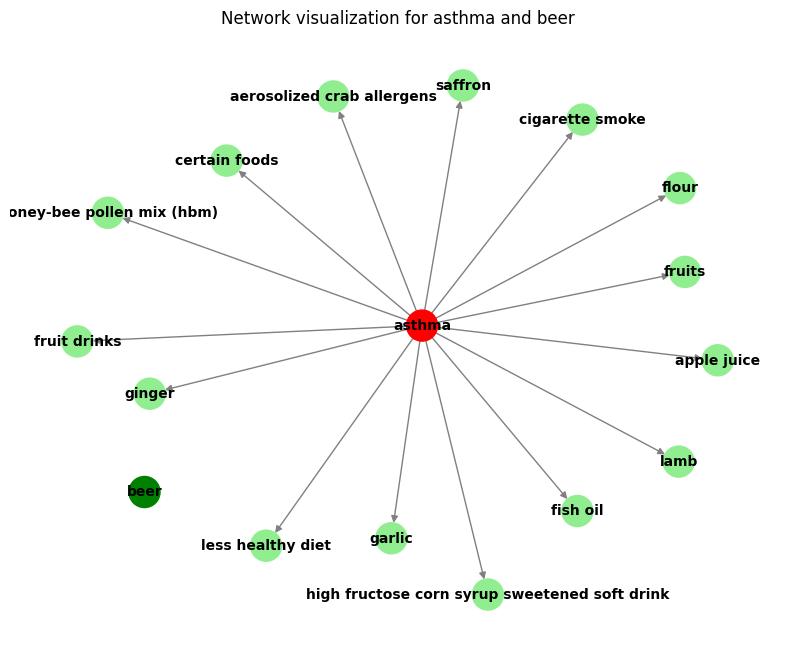

In [40]:
# After you've run your model and obtained recommendations
# from RecommendationExplainer import RecommendationExplainer, explain_recommendations
disease = 'asthma'
recommended_foods = recommend(disease)

# Get explanations for the asthma recommendations
explainer = explain_recommendations(disease, recommended_foods, model, data, node_ids, kg_df, top_n=5)

# For a single recommendation
food = recommended_foods[0]
print(f"\nDetailed explanation for {food}:")
explanation = explainer.get_explanation_text(disease, food)
print(explanation)

# Visualize the network for the top recommendation
explainer.visualize_recommendation_network(disease, food, save_path=f"{disease}_recommendation_network.png")

# You can also create an interactive dashboard function
def create_recommendation_dashboard(disease_name):
    """Create an interactive dashboard for food recommendations with explanations"""
    foods = recommend(disease_name)
    print(f"Top recommendations for {disease_name}:")
    
    explainer = RecommendationExplainer(model, data, node_ids, kg_df)
    
    for i, food in enumerate(foods[:10]):
        print(f"{i+1}. {food}")
        
    selected = int(input("\nEnter number for detailed explanation (1-10): ")) - 1
    if 0 <= selected < len(foods):
        selected_food = foods[selected]
        print("\n" + "="*80)
        print(f"DETAILED EXPLANATION FOR {selected_food.upper()}")
        print("="*80)
        explanation = explainer.get_explanation_text(disease_name, selected_food)
        print(explanation)
        
        if input("\nVisualize network? (y/n): ").lower() == 'y':
            explainer.visualize_recommendation_network(disease_name, selected_food)
    
    return foods, explainer

# Example usage
foods, explainer = create_recommendation_dashboard(disease)

In [6]:
pip install -q bs4 simhash

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -q lxml


Note: you may need to restart the kernel to use updated packages.


In [10]:
import requests
from bs4 import BeautifulSoup
from simhash import Simhash
from tqdm.auto import tqdm  # Auto-selects notebook or terminal
import pandas as pd

# --- Helper Functions ---
def deduplicate(docs, threshold=0.8):
    """Remove near-duplicate abstracts using SimHash"""
    hashes = [Simhash(doc['content']).value for doc in docs]
    unique_docs = []
    seen_hashes = set()
    
    for doc, h in zip(docs, hashes):
        if all(abs(h - seen_h) > (1 - threshold) * 64 for seen_h in seen_hashes):
            unique_docs.append(doc)
            seen_hashes.add(h)
    return unique_docs

def validate_abstract(doc, kg_food, kg_disease):
    """Check if abstract mentions both food and disease"""
    content = doc['content'].lower()
    return (kg_food.lower() in content) and (kg_disease.lower() in content)

# --- Main PubMed Fetching ---
def fetch_pubmed_abstracts(query, max_results=3):
    """Fetch abstracts from PubMed Central with error handling"""
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/"
    search_url = f"{base_url}esearch.fcgi?db=pmc&term={query}&retmax={max_results}&retmode=json"
    
    try:
        response = requests.get(search_url, timeout=10).json()
        pmc_ids = response["esearchresult"]["idlist"]
        abstracts = []
        
        for pmc_id in pmc_ids:
            fetch_url = f"{base_url}efetch.fcgi?db=pmc&id={pmc_id}"
            soup = BeautifulSoup(requests.get(fetch_url, timeout=10).text, "lxml-xml")
            if (abstract := soup.find("abstract")):
                abstracts.append({
                    "content": abstract.text.strip(),
                    "meta": {"source": "PubMed", "pmid": pmc_id}
                })
        return abstracts
    
    except Exception as e:
        tqdm.write(f"⚠️ Query '{query}' failed: {str(e)}")
        return []

# --- Pipeline ---
if __name__ == "__main__":
    
    # Step 1: Query PubMed with KG pairs
    disease_food_pairs = kg_df[kg_df['relationship'] == 'treats'][['disease', 'food']].drop_duplicates()
    final_docs = []
    
    # Wrap with tqdm for progress bar
    for _, row in tqdm(disease_food_pairs.iterrows(), total=len(disease_food_pairs), desc="Querying PubMed"):
        disease, food = row['disease'], row['food']
        queries = [
            f'"{food}" AND "{disease}"',  # Exact phrase match
            f'diet AND "{disease}"',
            f'nutrition AND "{disease}"'
        ]
        
        for query in queries:
            docs = fetch_pubmed_abstracts(query)
            for doc in docs:
                doc['meta'].update({"food": food, "disease": disease})
            final_docs.extend(docs)
            tqdm.write(f"ℹ️ Found {len(docs)} abstracts for '{query}'")
    
    # Step 2: Deduplicate
    tqdm.write("\nDeduplicating abstracts...")
    final_docs1 = deduplicate(final_docs)
    
    # Step 3: Validate against KG
    tqdm.write("Validating abstracts...")
    final_docs2 = [
        doc for doc in tqdm(final_docs1, desc="Validation") 
        if validate_abstract(doc, doc['meta']['food'], doc['meta']['disease'])
    ]
    
    print(f"\n✅ Total unique abstracts: {len(final_docs1)}")

Querying PubMed:   0%|          | 0/323 [00:00<?, ?it/s]

Querying PubMed:   0%|          | 0/323 [00:02<?, ?it/s]

ℹ️ Found 0 abstracts for '"bombax ceiba l. (bombacaceae) fruits" AND "urinary stones"'


Querying PubMed:   0%|          | 0/323 [00:20<?, ?it/s]

⚠️ Query 'diet AND "urinary stones"' failed: Couldn't find a tree builder with the features you requested: lxml-xml. Do you need to install a parser library?
ℹ️ Found 0 abstracts for 'diet AND "urinary stones"'


Querying PubMed:   0%|          | 1/323 [00:24<2:11:56, 24.59s/it]

⚠️ Query 'nutrition AND "urinary stones"' failed: Couldn't find a tree builder with the features you requested: lxml-xml. Do you need to install a parser library?
ℹ️ Found 0 abstracts for 'nutrition AND "urinary stones"'


Querying PubMed:   0%|          | 1/323 [00:27<2:28:42, 27.71s/it]


KeyboardInterrupt: 

In [ ]:
import json
with open("pubmed_abstracts.json", "w") as f:
    json.dump(final_docs, f, indent=2)

In [43]:
pip install -q faiss-cpu sentence-transformers pandas PyPDF2 requests


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 34.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 10.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
pubmed_docs = [
  {
    "content": "Background/AimAllicin is a small-molecule natural product found in garlic (Allium sativum). We previously showed that allicin inhibits ornithine decarboxylase (ODC) in vitro and induces apoptotic cell death in pediatric neuroblastoma (NB) cancer cell cultures. However, its potency as an anticancer agent in vivo has not been sufficiently explored.Materials and MethodsIn this study, we used cell proliferation assays, immunoblotting techniques, and light microscopy to study NB tumor cell cultures and human primary neonatal skin fibroblast control cells as well as a MYCN-amplified NB patient-derived xenograft (PDX) mouse tumor model to study the efficacy of allicin in vivo.ResultsAllicin strongly inhibits NB tumor cell proliferation in a dose-dependent manner while non-cancerous human primary neonatal skin fibroblast control cells were largely unaffected. Importantly, two intra-tumoral injections of allicin over a two-week trial period significantly reduced the NB tumor burden in mice compared to controls (N=4-9 mice/group). Excised tumor tissues revealed that allicin treatment increased the cyclin-dependent kinase inhibitor p27Kip1 protein levels, suggesting that in vivo, allicin increases p27Kip1-mediated G1/S cell cycle arrest.ConclusionOur findings warrant further preclinical development of allicin as a potential anticancer agent, especially for those types of cancers that are treatable by intra-tumoral injections, including neuroblastoma, glioblastoma, and medulloblastoma.",
    "meta": {
      "source": "PubMed",
      "pmid": "12041990",
      "food": "allium",
      "disease": "cancer"
    }
  },
  {
    "content": "Alzheimer's disease (AD)\u00a0is\u00a0characterized by beta-amyloid\u00a0plaques and neurofibrillary tangles, leading to damage of neuronal synapses, negatively impacting memory and cognition. Research efforts have shown the benefit of proper nutrition in reducing the progression of AD and slowing the condition's progression. Specifically, nutritional intake has been demonstrated to influence neuro-inflammatory pathways. Various diets, including ketogenic, Mediterranean, Mediterranean-DASH Intervention for Neurodegenerative Delay (MIND) diet, and Dietary Approaches to Stop Hypertension (DASH), have been shown to prevent the onset of AD to different degrees.\u00a0The primary objective of this scoping review was to assess the impacts of various diets on AD onset and progression to identify unmet needs and gaps in understanding. Following PRISMA (Preferred Reporting Items for Systematic Reviews and Meta-Analyses) guidelines, peer-reviewed literature was searched using Boolean operators: \u201cAlzheimer\u2019s\u201d AND \u201cketogenic\u201d OR \u201cDASH diet\u201d OR \u201cMIND diet\u201d OR \u201cMediterranean diet\u201d on EMBASE, MEDLINE, and Web of Science databases. The search was restricted to articles written in English and published in the United States between January 1, 2013, and September 30, 2023. The initial search yielded 121 articles after removing duplicates. After filtering based on inclusion and exclusion criteria, 24 articles were selected for further critical appraisal screening. The critical appraisal yielded 12 articles for the analysis included in this scoping review. This review supported the Mediterranean diet as the most effective in improving outcomes among patients with AD. The Mediterranean diet consists of a high intake of vegetables, fruits, legumes, nuts, olive oil, and unrefined cereals, a moderate intake of fish and wine, and a low intake of dairy products, meat, poultry, and saturated fat. Other diets reviewed, including the DASH and MIND diets, also have promising effects on AD, with less conclusive evidence when compared to the Mediterranean diet. Limitations, including small sample sizes, short durations, and socioeconomic constraints impacting compliance, were noted. This scoping review supports the need for dietary recommendation guidelines for patients with AD.",
    "meta": {
      "source": "PubMed",
      "pmid": "12034320",
      "food": "olive oil",
      "disease": "alzheimer's disease"
    }
  },
  {
    "content": "Background/Objectives: FimH adhesin, located at the tips of type 1 pili in Escherichia coli (E. coli), plays a crucial role in bacterial adhesion to the surface urothelial cells\u2014a key step in the pathogenesis of urinary tract infections (UTIs). Given the rising concern over antimicrobial resistance (AMR), and considering that E. coli is one of the pathogens with the largest AMR burdens on a global scale, alternative strategies targeting bacterial adhesion are gaining increasing attention. Products that contain D-mannose and cranberry-derived phenolic compounds have shown promise in preventing E. coli colonization and infection. The aim of this study was to investigate the antiadhesive effects of cranberry-related phenolic compounds on FimH-mediated E. coli adhesion using a cellular hemagglutination inhibition assay, as well as to assess the synergistic effects of mannose and phenolic compounds on biofilm formation. Methods: A range of phenolic acids (benzoic, chlorogenic, hippuric, p-coumaric, ferulic and caffeic), resveratrol, (+)-catechin and procyanidin A, as well as a Vaccinium macrocarpon extract, were evaluated for their ability to inhibit FimH-mediated adhesion. A binocular microscope was used to observe agglutination, and we also evaluated the biofilm inhibition potential of the phenolic compounds in the presence of D-mannose. Results: Our results demonstrated that these compounds significantly reduced hemagglutination, with benzoic acid, chlorogenic acid, caffeic acid and resveratrol exhibiting strong inhibitory effects at concentrations as low as 0.25 mM. Furthermore, the addition of 1 mM solutions of these phenolic compounds to D-mannose resulted in a twofold reduction in the inhibition titer, suggesting synergistic interactions. In addition to their antiadhesive properties, the tested phenolic compounds contributed slightly to the inhibition of FimH-mediated biofilm formation, further supporting their potential roles in UTI prevention. Conclusions: These findings highlight the potential of cranberry-derived phenolics as natural antiadhesive agents against E. coli and warrant further investigation into their mechanisms of action and possible applications in infection control.",
    "meta": {
      "source": "PubMed",
      "pmid": "12024225",
      "food": "vaccinium macrocarpon",
      "disease": "urinary tract infections"
    }
  },
  {
    "content": "In temperate regions, boars experience environmental heat stress due to the subtropical climate, leading to their semen quality and fertility being severely compromised compared to indigenous breeds. Considering the above effect, the present study aimed to evaluate the effect of season on semen quality, seminal plasma antioxidant status, and in vivo fertility of crossbred boars of exotic (50%) and indigenous inheritance in a subtropical climate. A total of 14 Hampshire\u2013Ghungroo crossbred boars were used for this investigation, which took place in both summer and winter. Sperm characteristics, namely motility, viability, abnormality, acrosomal integrity, and the hypo-osmotic swelling test (HOST) results, and mitochondrial membrane potential (MMP) were evaluated. Sperm kinematics parameters were assessed using computer-assisted semen analysis (CASA). Antioxidant biomarkers (glutathione peroxidase, GPx; catalase, CAT; and total antioxidant capacity, TAC) and lipid peroxidation (malondialdehyde, MDA) were analyzed in boars\u2019 seminal plasma. The summer season had a significant (p\u202f<\u202f0.01) negative impact on reaction time and false mounts, whereas semen volume and sperm concentration were significantly (p\u202f<\u202f0.01) higher in the winter season. Similarly, sperm abnormalities were significantly (p\u202f<\u202f0.01) lower in the winter season. In the winter, sperm quality parameters, namely total motility, progressive motility, viability, acrosomal integrity, and HOST reactivity, were significantly (p\u202f<\u202f0.01) improved. However, during the summer, sperm MMP was significantly (p\u202f<\u202f0.01) lower in fresh samples and after 72\u202fh of storage. Season had a significant (p\u202f<\u202f0.05) effect on the following sperm kinematics parameters: average path velocity, straight-line velocity, curve linear velocity, amplitude of lateral head displacement, and beat cross frequency. Semen characteristics were significantly (p\u202f<\u202f0.01) improved in winter after 72\u202fh of cold storage compared with those in summer. The summer season had a significant effect (p\u202f<\u202f0.01) on seminal plasma antioxidant biomarkers (TAC, MDA, CAT, and GPx). Furthermore, the farrowing rate was significantly (p\u202f<\u202f0.05) higher in the winter season. In conclusion, our results showed that the low MMP of boar sperm and the downregulation of seminal plasma antioxidant biomarkers in summer lead to poor semen quality and poor fertility in Hampshire\u2013Ghungroo crossbred boars in a subtropical climate. To alleviate the heat-stress-induced poor sperm fertility in boars and to optimize the fertility of boars during summer in subtropics, there is a need for scientific interventions in terms of genetics [less exotic inheritance (below 50%)], nutrition, and management.",
    "meta": {
      "source": "PubMed",
      "pmid": "12045030",
      "food": "nutrition",
      "disease": "ad"
    }
  },
  {
    "content": "Immunoglobulin A (IgA), the most abundantly produced antibody at mucosal surfaces, is thought to play key roles in immune responses to respiratory and enteric pathogens and in the regulation of commensal colonization. Low IgA levels have been associated with recurrent infections and immune dysregulation, including inflammatory bowel disease and autoimmunity. Levels of IgA in maternal breast milk and infant stool are both inversely associated with the emergence of immune responses to food antigens in infants and, in naturally resolving food sensitivity and immunotherapy protocols, the induction of IgA antibodies to dietary antigens has been associated with the acquisition of food tolerance. Here, we uncover new roles for IgA in intestinal immune homeostasis utilizing IgA Knockout (KO) mice generated by CRISPR/Cas9. IgA-deficient mice exhibit hyperimmunoglobulinemia, with increased levels of IgE and MCPT-1. The hyperimmunoglobulinemia is associated with dysregulated Tfh/Tfr responses in the Peyer\u2019s Patches (PPs) and spontaneous immunoglobulin production to chow diet. These findings shed light on important interactions between IgA, the mucosal immune system, and the regulation of Tfh responses, emphasizing the importance of IgA in maintaining immune homeostasis at mucosal surfaces.",
    "meta": {
      "source": "PubMed",
      "pmid": "12042271",
      "food": "breast milk",
      "disease": "infections"
    }
  },
  {
    "content": "The preventive effect of high-dose (9%) regular-fish oil (FO) against bone loss during aging has been demonstrated, but the effects of a low-dose (1%\u20134%) of a highly purified concentrated FO (CFO) has not been elucidated. The aim of this study was to determine the dose-dependent effect of a CFO against bone loss in C57BL/6 female mice during aging. Twelve-month old mice were fed with 1% and 4% CFO and 4% safflower oil (SFO) diets, including a group with a 4% regular-FO diet and a group with a lab chow diet for 12 months. Bone mineral density (BMD) was analyzed by dual-energy x-ray absorptiometry (DXA) before and after the dietary intervention. At the end of dietary intervention, bone resorption markers in serum and inflammatory markers in bone marrow and splenocytes and inflammatory signaling pathways in the bone marrow were analyzed. As compared to the 4% SFO control, 4% CFO maintained higher BMD during aging, while 1% CFO offered only a mild benefit. However, the 1% CFO fed group exhibited slightly better BMD than the 4% regular-FO fed group. BMD loss protection by CFO was accompanied by reduced levels of the bone resorption marker, TRAP, and the osteoclast-stimulating-factor, RANKL, without affecting the decoy-receptor of RANKL, osteoprotegerin (OPG). Further, CFO supplementation was associated with an increase in the production of IL-10, IL-12, and IFN-\u03b3 and a decrease in the production of TNF-\u03b1 and IL-6, and the activation of NF-\u03baB, p38 MAPK, and JNK signaling pathways. In conclusion, the supplementation of 4% CFO is very efficient in maintaining BMD during aging, whereas 1% CFO is only mildly beneficial. CFO supplementation starting at middle age may maintain better bone health during aging.",
    "meta": {
      "source": "PubMed",
      "pmid": "6893665",
      "food": "regular-fish oil",
      "disease": "bone loss"
    }
  },
  {
    "content": "Cancer cachexia, often observed in patients with advanced-stage cancer, is characterized by the loss of body weight and appetite. The Japanese herbal medicine Ninjinyoeito (NYT), which is composed of 12 crude herbal components, has been used as a therapeutic in Japan to improve anorexia and fatigue, which are commonly observed in cancer patients with cachexia. We have previously reported that Citrus unshiu peel (CUP) contained in NYT can enhance food intake by activating the orexin 1 receptor (OX1R). Using the CellKey\u2122 system, which offers detection of OXR activity in intracellular impedance changes, NYT and CUP were found to activate OX1R, which in turn was inhibited by SB-674042, a selective OX1R antagonist. Among the flavonoids contained in CUP, nobiletin and hesperidin, but not naringin, activated OX1R. Furthermore, some monoterpenes contained in CUP, including limonene and linalool, but not terpineol, activated OX1R. In addition, nobiletin and limonene synergistically activated OX1R when added simultaneously. However, neither NYT nor CUP induced OX2R activity. The results collectively suggested that the CUP contained in NYT activates OX1R, but not OX2R, and that flavonoids and monoterpenes in CUP can synergistically activate OX1R. These findings could provide evidence supporting the therapeutic potential of NYT in cancer patients with cachexia.",
    "meta": {
      "source": "PubMed",
      "pmid": "12025248",
      "food": "citrus unshiu",
      "disease": "fatigue"
    }
  },
  {
    "content": "The lockdown crisis due to novel coronavirus (COVID-19) mainly affected people who live under economic despair. Since boosting the immune system against the virus depends on a variety of food intake and lifestyle approaches; hence, it is crucial to know how daily food habits and lifestyle modification protect from pathogenic viral infections. This study focused on the benefit of plant-based foods, functional foods and the modified lifestyle which enhance the immunity of all aged groups against COVID-19 in Bangladesh. An online close-ended randomly selected structured multiple-choice questionnaire survey was conducted for people of different parts of Bangladesh (n = 161; male 51.55%, female 48.45%). The total percentage was counted for all variables. We found that plant-based foods, functional foods, and physical exercise played a vital role in enhancing people's immunity to control COVID-19. Plant-based micronutrients, nutraceuticals and antioxidants mainly took part to boost the immune system against the virus. Furthermore, physical activity had a vital role in improving people's immunity to manage COVID-19. Literature suggested that food habits, body immunity, awareness, stress and weight variation were affected by the COVID-19 pandemic. The vaccine or proper medication of COVID-19 still remains in an enigma. In this situation, boosting immunity to combat Coronavirus is the only way to survive.",
    "meta": {
      "source": "PubMed",
      "pmid": "8851826",
      "food": "functional foods",
      "disease": "pathogenic viral infections"
    }
  }
]

In [44]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Load BioBERT model
model = SentenceTransformer("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract")

# Prepare documents (combine all sources)
documents = [
    {"text": doc["content"], "source": doc["meta"]['source'], "id": doc["meta"]['pmid']} 
    for doc in pubmed_docs
]

# Extract text and metadata
texts = [doc["text"] for doc in documents]
metadata = [{"source": doc["source"], "id": doc["id"]} for doc in documents]

# Generate embeddings
embeddings = model.encode(texts, show_progress_bar=True)
embeddings = np.array(embeddings).astype('float32')

# Build FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # L2 distance metric
index.add(embeddings)

# Save index and metadata
faiss.write_index(index, "food_disease_faiss_index.bin")
import pickle
with open("metadata.pkl", "wb") as f:
    pickle.dump(metadata, f)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/225k [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
with open("texts.pkl", "wb") as f:
    pickle.dump(texts, f)

In [46]:
def search(query, top_k=5):
    # Load index and metadata
    index = faiss.read_index("/kaggle/working/food_disease_faiss_index.bin")
    with open("/kaggle/working/metadata.pkl", "rb") as f:
        metadata = pickle.load(f)
    
    # Encode query
    query_embedding = model.encode([query])
    query_embedding = np.array(query_embedding).astype('float32')
    
    # Search FAISS
    distances, indices = index.search(query_embedding, top_k)
    
    # Return results
    results = []
    for idx, distance in zip(indices[0], distances[0]):
        results.append({
            "text": texts[idx],
            "source": metadata[idx]["source"],
            "id": metadata[idx]["id"],
            "score": float(1 / (1 + distance))  # Convert distance to similarity
        })
    return results

# Example query
results = search("foods that treats cancer")
for result in results:
    print(f"Source: {result['source']}\nScore: {result['score']:.3f}\nText: {result['text'][:200]}...\n")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Source: PubMed
Score: 0.005
Text: The lockdown crisis due to novel coronavirus (COVID-19) mainly affected people who live under economic despair. Since boosting the immune system against the virus depends on a variety of food intake a...

Source: PubMed
Score: 0.003
Text: Immunoglobulin A (IgA), the most abundantly produced antibody at mucosal surfaces, is thought to play key roles in immune responses to respiratory and enteric pathogens and in the regulation of commen...

Source: PubMed
Score: 0.003
Text: Alzheimer's disease (AD) is characterized by beta-amyloid plaques and neurofibrillary tangles, leading to damage of neuronal synapses, negatively impacting memory and cognition. Research efforts have ...

Source: PubMed
Score: 0.003
Text: Cancer cachexia, often observed in patients with advanced-stage cancer, is characterized by the loss of body weight and appetite. The Japanese herbal medicine Ninjinyoeito (NYT), which is composed of ...

Source: PubMed
Score: 0.003
Text: The preven

In [47]:
import faiss
import pickle
import numpy as np
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract")

# Load FAISS index
index = faiss.read_index("/kaggle/working/food_disease_faiss_index.bin")

# Load metadata and texts
with open("/kaggle/working/metadata.pkl", "rb") as f:
    metadata = pickle.load(f)

with open("/kaggle/working/texts.pkl", "rb") as f:
    texts = pickle.load(f)

# Search function
def search(query, top_k=5):
    # Encode query
    query_embedding = model.encode([query])
    query_embedding = np.array(query_embedding).astype('float32')

    # Search FAISS
    distances, indices = index.search(query_embedding, top_k)

    # Format results
    results = []
    for idx, distance in zip(indices[0], distances[0]):
        results.append({
            "text": texts[idx],
            "source": metadata[idx]["source"],
            "id": metadata[idx]["id"],
            "score": float(1 / (1 + distance))  # Similarity score
        })
    return results

# Example usage
query = "foods that help in cancer prevention"
results = search(query)

# Show results
for result in results:
    print(f"Source: {result['source']}")
    print(f"PMID: {result['id']}")
    print(f"Score: {result['score']:.3f}")
    print(f"Text: {result['text'][:200]}...\n")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Source: PubMed
PMID: 8851826
Score: 0.009
Text: The lockdown crisis due to novel coronavirus (COVID-19) mainly affected people who live under economic despair. Since boosting the immune system against the virus depends on a variety of food intake a...

Source: PubMed
PMID: 12042271
Score: 0.007
Text: Immunoglobulin A (IgA), the most abundantly produced antibody at mucosal surfaces, is thought to play key roles in immune responses to respiratory and enteric pathogens and in the regulation of commen...

Source: PubMed
PMID: 12034320
Score: 0.007
Text: Alzheimer's disease (AD) is characterized by beta-amyloid plaques and neurofibrillary tangles, leading to damage of neuronal synapses, negatively impacting memory and cognition. Research efforts have ...

Source: PubMed
PMID: 6893665
Score: 0.007
Text: The preventive effect of high-dose (9%) regular-fish oil (FO) against bone loss during aging has been demonstrated, but the effects of a low-dose (1%–4%) of a highly purified concentrated FO 